In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, cross_validate, validation_curve, learning_curve

In [18]:
# Read data
df = pd.read_csv('blood_transfusion.csv')
data = df.drop(columns='Class')
target = df['Class']

In [19]:
# Create model and get results
model = make_pipeline(scaler(), SVC())
cv = ShuffleSplit(random_state=0)
results = cross_validate(model, data, target, cv=cv, n_jobs=2)
results = pd.DataFrame(results)
results

,fit_time,score_time,test_score
0,0.037720,0.000000,0.680000
1,0.037720,0.000000,0.746667
2,0.015649,0.000000,0.786667
3,0.015649,0.000000,0.800000
4,0.015626,0.015625,0.746667
5,0.016750,0.000000,0.786667
6,0.015626,0.015625,0.800000
7,0.016750,0.000000,0.826667
8,0.015641,0.000000,0.746667
9,0.015641,0.000000,0.733333


In [20]:
# Set of gamma values to test
#model.get_params().keys()
gammas = np.logspace(-3, 2, num=30)
train_scores, test_scores = validation_curve(model, data, target, param_name='svc__gamma', 
                                             param_range=gammas,cv=cv,
                                             n_jobs=2)

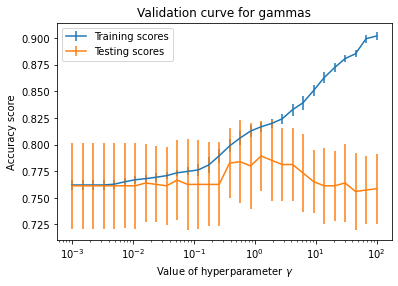

In [21]:
#Plotting train and test error curves
plt.errorbar(gammas, train_scores.mean(axis=1), yerr=train_scores.std(axis=1), label='Training scores')
plt.errorbar(gammas, test_scores.mean(axis=1), yerr=test_scores.std(axis=1), label='Testing scores')
plt.legend()

#plt.xscale("log")
plt.xscale("log")
plt.xlabel(r"Value of hyperparameter $\gamma$")
plt.ylabel("Accuracy score")
_ = plt.title('Validation curve for gammas')

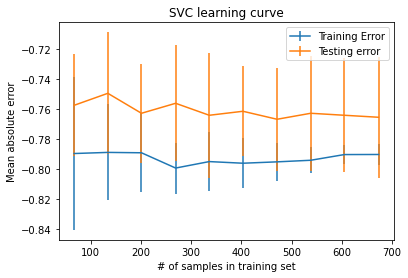

In [22]:
#Plotting train and test error curves - Changing training sizes
train_sizes = np.linspace(0.1, 1.0, num=10)
results = learning_curve(model, data, target, train_sizes=train_sizes, cv=cv,
                        scoring=None, n_jobs=2)
train_size, train_scores, test_scores = results[:3]
train_errors, test_errors = -train_scores, -test_scores

plt.errorbar(train_size, train_errors.mean(axis=1), 
             yerr=train_errors.std(axis=1), 
             label='Training Error')
plt.errorbar(train_size, test_errors.mean(axis=1),
            yerr=test_errors.std(axis=1),
            label='Testing error')
plt.legend()
plt.xlabel('# of samples in training set')
plt.ylabel('Mean absolute error')
_ = plt.title('SVC learning curve')